In [5]:
#importing librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('College_Data',index_col=0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


/Users/rishav/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


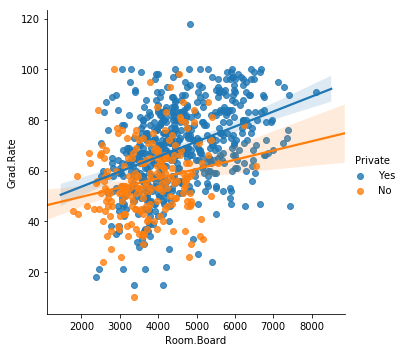

In [6]:
sns.lmplot(x='Room.Board',y='Grad.Rate',data=df,hue='Private')

/Users/rishav/anaconda2/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


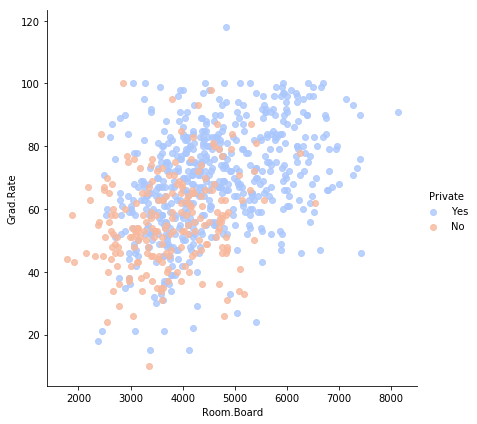

In [8]:
sns.lmplot(x='Room.Board',y='Grad.Rate',data=df,hue='Private',
          fit_reg=False,palette='coolwarm',size=6,aspect=1)

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300,random_state=0)
    kmeans.fit(df.drop('Private',axis=1))
    wcss.append(kmeans.inertia_)

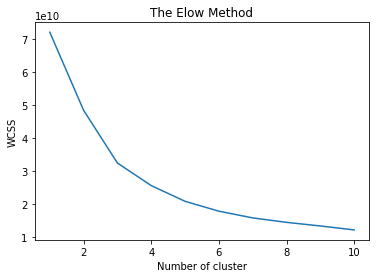

In [11]:
plt.plot(range(1,11),wcss)
plt.title('The Elow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.cluster_centers_

array([[1.06216145e+04, 7.30063855e+03, 2.93942169e+03, 3.20000000e+01,
        6.34698795e+01, 1.54825060e+04, 3.17455422e+03, 8.23585542e+03,
        4.13487952e+03, 5.94349398e+02, 1.88833735e+03, 8.41566265e+01,
        8.95542169e+01, 1.64072289e+01, 1.58072289e+01, 9.44095181e+03,
        6.05060241e+01],
       [1.70182301e+03, 1.23653451e+03, 4.91520354e+02, 2.18194690e+01,
        4.97769912e+01, 2.22618053e+03, 6.56030088e+02, 9.28193982e+03,
        4.14370619e+03, 5.37015929e+02, 1.32979646e+03, 6.75787611e+01,
        7.51433628e+01, 1.46362832e+01, 2.09274336e+01, 7.83074690e+03,
        6.28070796e+01],
       [3.79185271e+03, 2.04663566e+03, 6.53937984e+02, 4.98372093e+01,
        7.72248062e+01, 2.57355039e+03, 2.35829457e+02, 1.69343256e+04,
        5.43727907e+03, 5.74604651e+02, 1.03575194e+03, 8.75193798e+01,
        9.33333333e+01, 1.02046512e+01, 3.51627907e+01, 1.78138140e+04,
        8.02868217e+01]])